In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Q1: Check and print the versions of TensorFlow and Keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.12.0
Keras version: 2.12.0


In [3]:
# Q2: Load the Wine Quality dataset and explore its dimensions
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')
print("Dataset dimensions:", df.shape)

Dataset dimensions: (1599, 12)


In [4]:
# Q3: Check for null values and identify categorical variables
print("Null values in the dataset:", df.isnull().sum())

Null values in the dataset: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Q4: Separate the features and target variables
X = df.drop('quality', axis=1)
y = df['quality']

In [6]:
# Q5: Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Q6: Perform scaling on the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Q7: Create at least 2 hidden layers and an output layer for the binary categorical variables
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [9]:
# Q8: Add all the layers to the Sequential model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [10]:
# Q9: Implement a TensorBoard callback to visualize and monitor the model's training process
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [11]:
# Q10: Use Early Stopping to prevent overfitting by monitoring a chosen metric
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [12]:
# Q11: Implement a ModelCheckpoint callback to save the best model during training
model_checkpoint_callback = callbacks.ModelCheckpoint(filepath='./best_model.h5', monitor='val_loss', save_best_only=True)


In [13]:
# Q12: Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Q13: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Q14: Fit the model to the data, incorporating the callbacks
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])


Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: -1.3006 - accuracy: 0.0000e+00 - val_loss: -6.6083 - val_accuracy: 0.0000e+00
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: -13.6694 - accuracy: 0.0000e+00 - val_loss: -24.4355 - val_accuracy: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: -39.6533 - accuracy: 0.0000e+00 - val_loss: -62.9126 - val_accuracy: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: -92.2210 - accuracy: 0.0000e+00 - val_loss: -137.2360 - val_accuracy: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: -188.4275 - accuracy: 0.0000e+00 - val_loss: -266.1878 - val_accuracy: 0.0000e+00
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: -348.0561 - accuracy: 0.0000e+00 - val_loss: -472.5708 - val_accuracy: 0.0000e+00
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: -592.

In [16]:
# Q15: Get the model's parameters
model_params = model.get_weights()

In [17]:
# Q16: Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

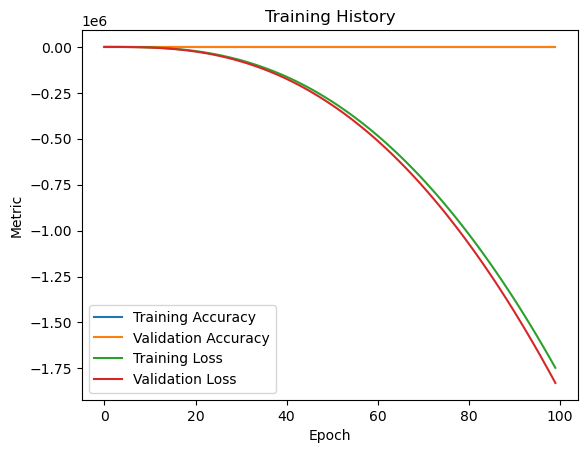

In [18]:
# Q17: Plot the model's training history
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training History')
plt.show()


In [19]:
# Q18: Evaluate the model's performance using the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 3ms/step - loss: -1857673.5000 - accuracy: 0.0000e+00
Test Loss: -1857673.5
Test Accuracy: 0.0
